In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import keras
from tensorflow.keras.layers import Conv2D
import shutil

In [85]:
src_root = "COVID-19_Radiography_Dataset"
dst_root = "Clean_Dataset"

os.makedirs(dst_root, exist_ok=True)

# Loop through each class (COVID, Normal, etc.)
for cls in os.listdir(src_root):
    class_path = os.path.join(src_root, cls)
    if not os.path.isdir(class_path):
        continue

    images_path = os.path.join(class_path, "images")
    masks_path = os.path.join(class_path, "masks")

    # Create clean folder for this class
    dst_class = os.path.join(dst_root, cls)
    os.makedirs(dst_class, exist_ok=True)

    # Copy only image files
    if os.path.exists(images_path):
        for file in os.listdir(images_path):
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                src_file = os.path.join(images_path, file)
                dst_file = os.path.join(dst_class, file)
                shutil.copy(src_file, dst_file)

print("✅ Clean dataset created successfully in:", dst_root)

✅ Clean dataset created successfully in: Clean_Dataset


In [87]:
train_dir = "Clean_Dataset"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)

Found 16933 images belonging to 4 classes.
Found 4232 images belonging to 4 classes.


In [88]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 826,724 (3.15 MB)

 Trainable params: 826,724 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=25
)



d:\CNN\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 437s 206ms/step - accuracy: 0.6262 - loss: 0.9101 - val_accuracy: 0.6942 - val_loss: 0.7164
Epoch 2/25
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.6819 - loss: 0.7826 - val_accuracy: 0.7372 - val_loss: 0.6476
Epoch 3/25
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7042 - loss: 0.7318 - val_accuracy: 0.7769 - val_loss: 0.6103
Epoch 4/25
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7316 - loss: 0.6764 - val_accuracy: 0.7918 - val_loss: 0.5409
Epoch 5/25
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7532 - loss: 0.6361 - val_accuracy: 0.8077 - val_loss: 0.5256
Epoch 6/25
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7691 - loss: 0.6014 - val_accuracy: 0.8084 - val_loss: 0.4996
Epoch 7/25
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7806 - loss: 0.5806 - val_accuracy: 0.8195 - val_loss: 0.4973
Epoch 8/25
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7840

In [90]:
model.save("lung_disease_cnn_128_final.h5")

In [91]:
from tensorflow.keras.models import load_model
model = load_model("lung_disease_cnn_128_final.h5")

In [92]:
model.evaluate(val_gen)
model.predict(train_gen)

529/529 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.8611 - loss: 0.3822
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 53s 25ms/step


array([[5.5092486e-04, 4.2900813e-04, 7.9628043e-02, 9.1939199e-01],
       [1.6700377e-06, 6.1283098e-03, 9.9387002e-01, 1.9238325e-17],
       [7.3319733e-08, 2.5440708e-02, 9.7455919e-01, 2.8075888e-19],
       ...,
       [1.8284259e-06, 9.7641073e-02, 9.0235704e-01, 1.2014564e-12],
       [1.6583892e-06, 9.7935450e-01, 2.0643836e-02, 9.9942055e-10],
       [8.9263022e-02, 7.5550623e-02, 8.3518642e-01, 2.8486774e-08]],
      shape=(16933, 4), dtype=float32)

In [93]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.__class__.__name__)

0 conv2d_29 Conv2D
1 max_pooling2d_27 MaxPooling2D
2 conv2d_30 Conv2D
3 max_pooling2d_28 MaxPooling2D
4 conv2d_31 Conv2D
5 max_pooling2d_29 MaxPooling2D
6 flatten_8 Flatten
7 dense_16 Dense
8 dropout_8 Dropout
9 dense_17 Dense


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


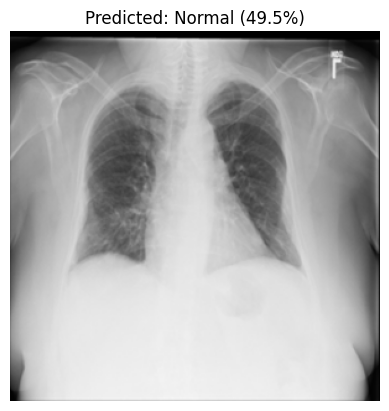

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


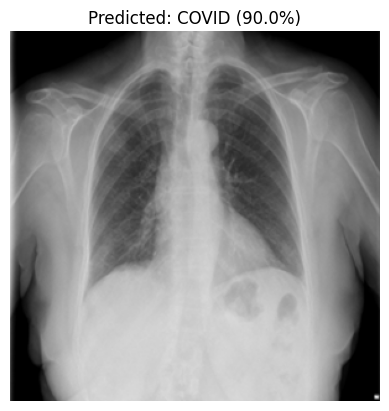

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


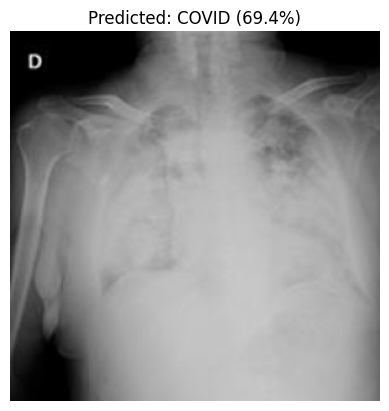

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


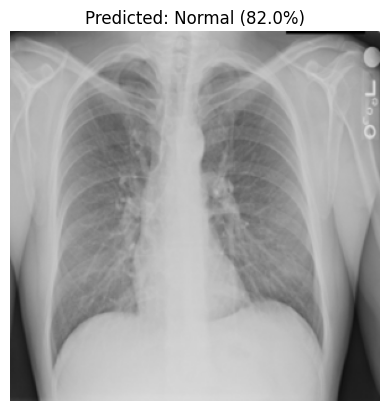

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


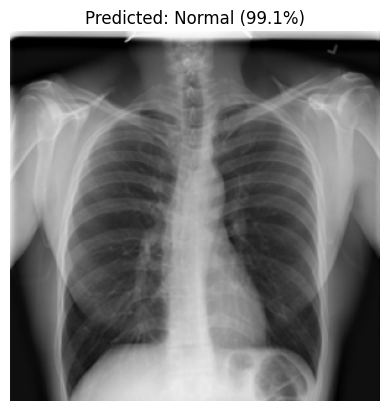

In [96]:
class_labels = list(train_gen.class_indices.keys())

# Pick a few test images to visualize predictions
import random
for i in range(5):
    img_path = random.choice(train_gen.filepaths)
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    pred_class = np.argmax(prediction)
    confidence = np.max(prediction)

    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted: {class_labels[pred_class]} ({confidence*100:.1f}%)")
    plt.axis("off")
    plt.show()